# Customer Clustering With K-Means algorithm

### importing modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Dataset

In [4]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking for none-numeric data-type

In [5]:
print(df.dtypes)
print(df.shape)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
(200, 5)


Now we know that Gender column in dataset is a none-numeric datatype. so we have to convert it with **LabelEncoder**

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
df.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### standardizing data

In [12]:
from sklearn.preprocessing import StandardScaler

x = df.values

x = StandardScaler().fit_transform(x)
x[:5]

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148,
        -0.66995636],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407,
        -0.66995636],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298,
         0.83134641],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783,
         0.83134641],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992,
         0.83134641]])

## Model Training with different K values

>class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

I used **init="random** but the results were lower the **init=kmeans++**.

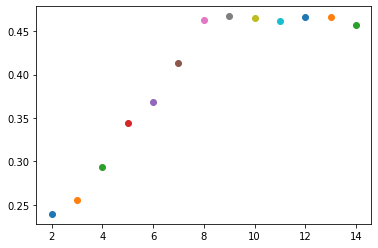

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

N = [i for i in range(2,15)]
results = list()

for n in N:
    k_means = KMeans(n_clusters=n, init="k-means++", n_init=15)
    k_means.fit(x)
    labels = k_means.labels_

    df["Cluster"] = labels

    silhouette = silhouette_score(x,labels)
    results.append([n, silhouette])
    
    
for result in results:
    plt.scatter(result[0], result[1])

## Choosing the best K
as you can see above, the accuracy rises while **k** rises. but thats untill a certain point. the rest depends on you to choose whichever **k** you want.

I chose 8 for example :

In [15]:
k_means = KMeans(n_clusters=8,  init='k-means++', n_init=12, random_state=4)
k_means.fit(x)
labels = k_means.labels_

df["Cluster"] = labels
df.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,64.170732,0.0,27.219512,44.439024,56.243902
1,171.000000,0.0,44.600000,92.333333,21.600000
2,50.521739,1.0,25.043478,38.652174,59.608696
3,159.500000,1.0,39.500000,85.150000,14.050000
4,158.368421,1.0,32.947368,86.052632,81.263158
5,69.692308,1.0,58.115385,48.038462,41.269231
6,65.742857,0.0,51.600000,46.342857,40.742857
7,163.333333,0.0,32.190476,86.047619,81.666667


- the overall, gender values means are below 0.5. so we can say that majoriy of costumers are women.<br>
- The age range of each cluster can be identified<br>
- The Annual Income range of each cluster can be identified<br>
- The Spending Score range of each cluster can be identified<br>

# By Sina Kazemi